In [1]:
# For GPU users
!pip install tensorflow[and-cuda]
# For CPU users
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip3 install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2023-10-24 22:51:59.245280: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 22:51:59.247749: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 22:51:59.295996: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 22:51:59.296916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 22:52:00.199473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [6]:
mp_holistic  = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #utilidades de dibujo

In [7]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convierte de BGR a RGB
    image.flags.writeable = False  #La imagen no es writeable
    results = model.process(image)  #image es el frame del open cv, hace la prediccion
    image.flags.writeable = True     #la imagen es writable 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #convierte de RGB a BGR
    return image,results 


In [8]:
def draw_landmarks(image,results): #dibujar las marcas en la imagen
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano derecha 

    

In [9]:
def draw_styled_landmarks(image,results): #dibuja los landmarks refinados 
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(50,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(254,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano derecha 


In [29]:
#abre la webcam y va entre los frames
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened():
    #lee el feed
    ret,frame = cap.read()

    #hace la deteccion
    image, results = mediapipe_detection(frame,holistic)
    print(results)
    #dibuja  los landmarks
    draw_styled_landmarks(image,results)
    #Lo muestra en la pantalla
    cv2.imshow('OpenCV Feed',image)

    #Rompe el loop si se apreta q
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame,results)

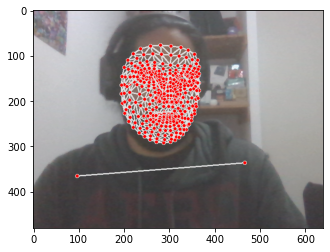

In [14]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [15]:
results.face_landmarks

landmark {
  x: 0.4669032692909241
  y: 0.4699981212615967
  z: -0.035207461565732956
}
landmark {
  x: 0.47495758533477783
  y: 0.41086259484291077
  z: -0.06185152381658554
}
landmark {
  x: 0.4691120684146881
  y: 0.4284754693508148
  z: -0.03381906449794769
}
landmark {
  x: 0.46436968445777893
  y: 0.3527533710002899
  z: -0.04673522710800171
}
landmark {
  x: 0.4763842821121216
  y: 0.3931218683719635
  z: -0.06523553282022476
}
landmark {
  x: 0.47592461109161377
  y: 0.36996138095855713
  z: -0.059828370809555054
}
landmark {
  x: 0.4726293981075287
  y: 0.3143211603164673
  z: -0.026794951409101486
}
landmark {
  x: 0.3809850811958313
  y: 0.3019772469997406
  z: 0.0029124871362000704
}
landmark {
  x: 0.4724847674369812
  y: 0.2763473391532898
  z: -0.017051490023732185
}
landmark {
  x: 0.4739770293235779
  y: 0.25369793176651
  z: -0.017995750531554222
}
landmark {
  x: 0.4762669503688812
  y: 0.16521421074867249
  z: -0.0003930656530428678
}
landmark {
  x: 0.4662463068962

In [16]:
pose = [] #array para gaursar los landmarks
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [17]:
pose

[array([ 0.4518075 ,  0.38531706, -1.73577726,  0.99990499]),
 array([ 0.47324839,  0.29127344, -1.65968454,  0.99977612]),
 array([ 0.4910543 ,  0.28999323, -1.65983999,  0.99981964]),
 array([ 0.51137614,  0.29062361, -1.66011429,  0.99976766]),
 array([ 0.40923625,  0.29788083, -1.66805708,  0.99976665]),
 array([ 0.38165852,  0.30204672, -1.66702485,  0.99980044]),
 array([ 0.36042613,  0.30777606, -1.66749024,  0.99977171]),
 array([ 0.53922582,  0.32830578, -1.10165095,  0.99978608]),
 array([ 0.32350296,  0.35066679, -1.11598086,  0.99985218]),
 array([ 0.4875474 ,  0.46293077, -1.5195173 ,  0.99990577]),
 array([ 0.4055596 ,  0.47302592, -1.52429557,  0.9999246 ]),
 array([ 0.73071349,  0.70129132, -0.67406738,  0.99880284]),
 array([ 0.15188414,  0.76113093, -0.77174526,  0.99849689]),
 array([ 0.88416088,  1.03830683, -0.65280116,  0.16082627]),
 array([ 0.01134713,  1.27634013, -0.66435945,  0.32095179]),
 array([ 0.9468317 ,  1.57691634, -1.26412809,  0.02667135]),
 array([

In [18]:
pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande

In [19]:

def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
    face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
    lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    return np.concatenate([pose,face,lh,rh])
    

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.4518075 ,  0.38531706, -1.73577726, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0',result_test)

In [23]:
np.load('0.npy')

array([ 0.4518075 ,  0.38531706, -1.73577726, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
extract_keypoints(results).shape

(1662,)

In [25]:
#path para la data exportada
DATA_PATH = os.path.join('MP_Data') # variable que guarda 

#Aciones detectadas
actions = np.array(['hello','thanks','iloveyou'])
no_sequences = 30 #Cantidad de videos que se recolectaran por accion
sequence_length = 30 #30 es la cantidad de frames de data que va a utilizar 
#lo que se hara para la info es recolectar 30 videos de 30 frames cada un por accion (son 3 acciones) por la cantidad de keypoints que se tienen que son 1662 (entre todas las  variables)

In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [30]:
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
    #lee el feed
                ret,frame = cap.read()

    #hace la deteccion
                image, results = mediapipe_detection(frame,holistic)
                print(results)
            #dibuja  los landmarks
                draw_styled_landmarks(image,results)
            
                if frame_num == 0 :
                    cv2.putText(image,'Sarting Collection',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)# IMprime Starting Collection
                    cv2.putText(image,'Colelecting Frasmes for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                
                else :
                    cv2.putText(image,'Colelecting Frasmes for {} Video Number {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                
                #Exportamos los Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #Lo muestra en la pantalla
                cv2.imshow('OpenCV Feed',image)

                #Rompe el loop si se apreta q
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [28]:
cap.release()
cv2.destroyAllWindows()
